## Import library

In [1]:
import seaborn as sns

import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ta 
import plotly.graph_objects as go
import stock_lib as stlib

## Import data

In [2]:
data = yf.download("TSLA", period='60d', interval='5m')
data = data.reset_index()
rsi = ta.momentum.RSIIndicator(close=data['Close'])
data['rsi'] = rsi.rsi()

data['rsi_diff'] = data['rsi'].diff(periods=10)
data['rsi_10'] = data['rsi'] - data['rsi_diff']
data['rsi_diff'] = data['rsi_diff'] / (data['rsi'] - data['rsi_diff'])

data['close_5'] = data['Close'].diff(periods=-5)
data['close_5'] = data['close_5'] / data['Close']

data['close_10'] = data['Close'].diff(periods=10)
data['close_10'] = data['close_10'] / (data['Close'] - data['close_10'])

data = data.dropna()
data1 = data[['rsi', 'rsi_diff', 'rsi_10', 'close_5', 'close_10']]

[*********************100%***********************]  1 of 1 completed


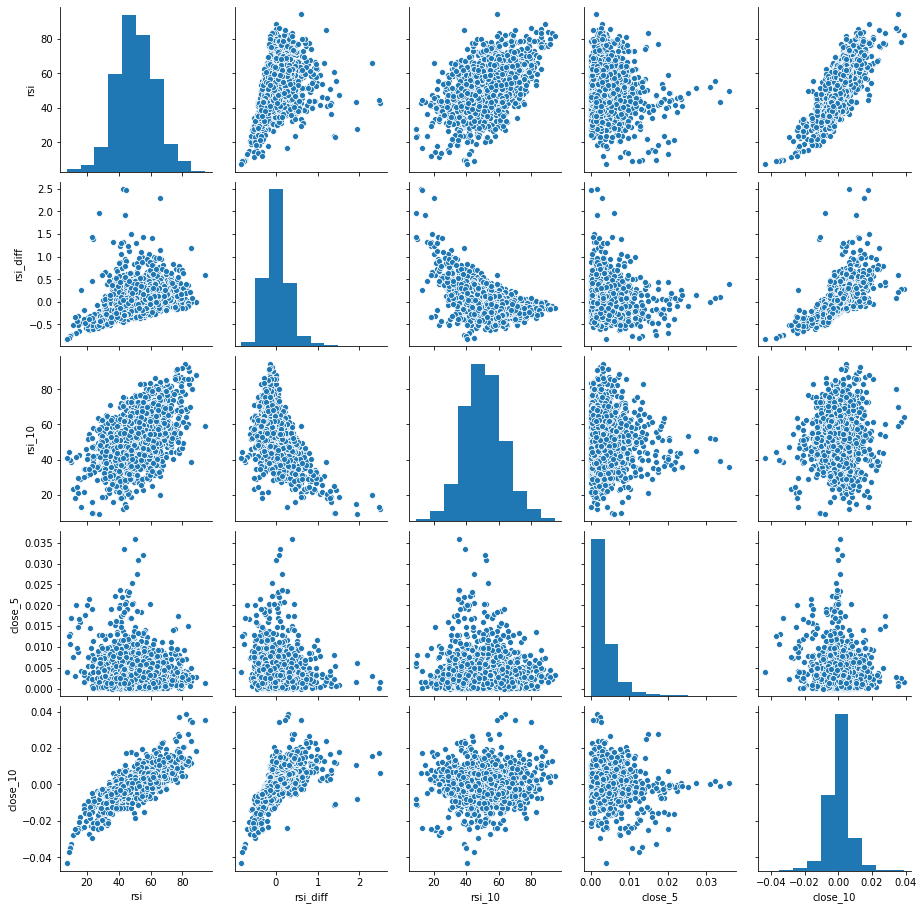

In [3]:
data2 = data1[data1['close_5'] > 0]
sns.pairplot(data2)

## Create Model

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', 
                    hidden_layer_sizes=(20, 20),
                    max_iter=200,
                    random_state=1)

X = data2.drop(['close_5'], axis=1).to_numpy()
y = data2[['close_5']].to_numpy()

X = np.array(X)
y = np.array(y).ravel()

print(X.shape)
print(y.shape)

(2384, 4)
(2384,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print(clf.score(X, y))
print("actual value: ", y_test * 100)
print("prediction:   ", prediction * 100)

diff = y_test - prediction
print("different:    ", np.absolute(diff))

print(metrics.r2_score(y_test, prediction))

-2.564200226036668
actual value:  [0.15648634 0.24785078 0.34162001 0.66601266 0.00368299 0.07280341
 1.91513308 0.32135266 0.92341606 0.06889792 0.15214977 0.35653359
 0.22413354 1.0550496  0.14441139 0.05975672 0.08624471 0.21854401
 0.10581283 0.61217523]
prediction:    [ 3.96141690e+00  3.40830020e-01  8.40742862e-01  6.27535878e-02
  1.00962454e-01 -3.41209678e-03 -4.73322358e-01  5.42191436e-02
  6.93518865e-01  6.45697370e-01  7.97558339e-01  2.29915423e-01
  3.32373211e-01  7.07505338e-02  3.08084018e-01  9.21696222e-02
  6.57097937e-02  7.19490998e-02  7.34146458e-01  3.11980561e-01]
different:     [0.03804931 0.00092979 0.00499123 0.00603259 0.00097279 0.00076216
 0.02388455 0.00267134 0.00229897 0.00576799 0.00645409 0.00126618
 0.0010824  0.00984299 0.00163673 0.00032413 0.00020535 0.00146595
 0.00628334 0.00300195]
-4.706226525283633
